## 트리

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
# import squarify
from dotenv import load_dotenv
import matplotlib.patches as mpatches

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# .env 파일 로드
load_dotenv()

# 환경변수에서 파일 경로 가져오기
file_path1 = r'C:\Users\hyunj\machin_prj\지역\수도권_지역.xlsx' # 수도권
file_path2 =r'C:\Users\hyunj\machin_prj\지역\전국.xlsx'  # 전국

# 파일 불러오기
df1 = pd.read_excel(file_path1)
df2 = pd.read_excel(file_path2)

# 서울 데이터 컬럼명 통일

# 지역명 추가
df1['지역'] = '수도권(서울/경기/인천)'
df2['지역'] = '전국'

# 필요한 열만 추출
df1_subset = df1[['지역', 'cat1', 'cat2', 'cat3']]

df2_subset = df2[['지역', 'cat1', 'cat2', 'cat3']]


In [2]:

# 데이터 통합
df_combined = pd.concat([df1_subset, df2_subset], ignore_index=True)

# 소분류 기준 건수 집계
df_grouped = df1_subset['cat3'].value_counts().reset_index()
df_grouped.columns = ['소분류', '건수']

# 중분류 기준 건수 집계
df_grouped1 = df1_subset['cat2'].value_counts().reset_index()
df_grouped1.columns = ['중분류', '건수']


# 대분류 기준 건수 집계
df_grouped2 = df1_subset['cat1'].value_counts().reset_index()
df_grouped2.columns = ['대분류', '건수']

# 상위 n개만 시각화 (너무 많으면 글자 겹침)
top_n = 20
df_top1 = df_grouped.head(top_n)
df_top2 = df_grouped1.head(top_n)
df_top3 = df_grouped2.head(top_n)

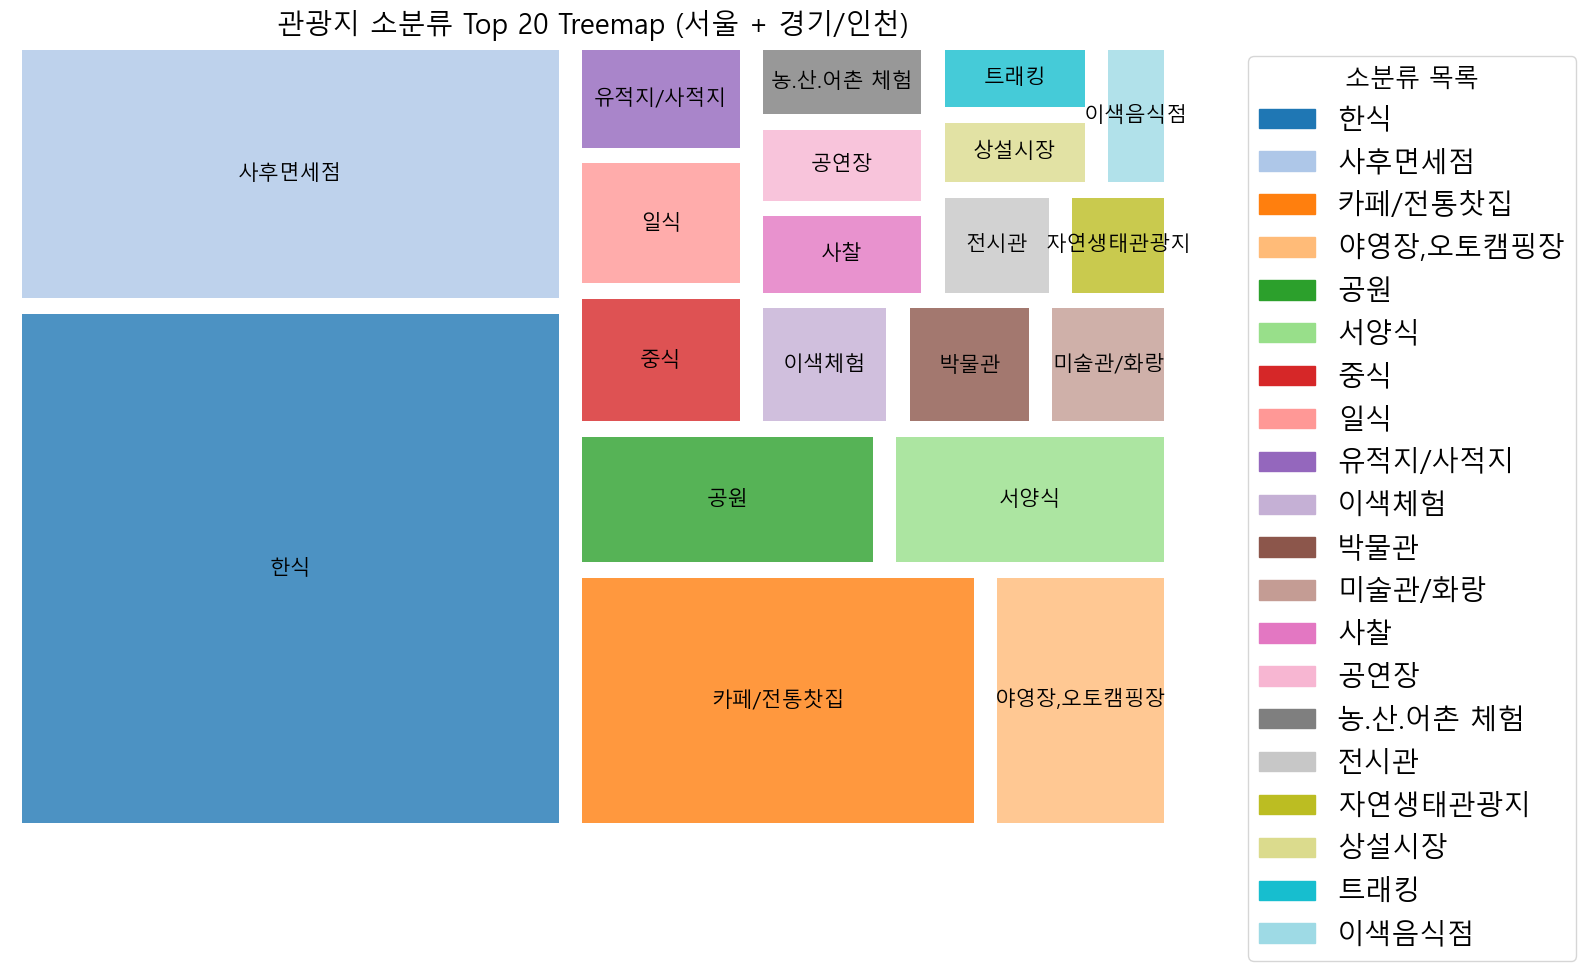

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import matplotlib.patches as mpatches


# Treemap 시각화 (소분류)
plt.figure(figsize=(16, 10))

# 1) 색상 팔레트 지정
#   - 예: plt.cm.tab20, plt.cm.Set3, plt.cm.Paired 등 다양한 팔레트 사용 가능
colors = plt.cm.tab20(range(len(df_top1)))  

# 2) Treemap 생성
squarify.plot(
    sizes=df_top1['건수'],
    label=df_top1['소분류'],
    color=colors,            # 색상 적용
    alpha=0.8,
    pad=True,
    text_kwargs={'fontsize': 15}
)

plt.title(f'관광지 소분류 Top {len(df_top1)} Treemap (서울 + 경기/인천)', fontsize=20)
plt.axis('off')

# 3) 범례(legend) 만들기
#   - 각 구역별 색상과 라벨을 1:1로 매핑하여 Patch 생성
patches = [
    mpatches.Patch(color=colors[i], label=df_top1['소분류'].iloc[i])
    for i in range(len(df_top1))
]

# 4) 범례 표시 (우상단에 배치 예시)
legend = plt.legend(
    handles=patches,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=20,           # 텍스트 크기를 키움
    title='소분류 목록',    # 범례 제목 (선택 사항)
    title_fontsize=18      # 범례 제목 텍스트 크기
)

plt.tight_layout()
plt.show()



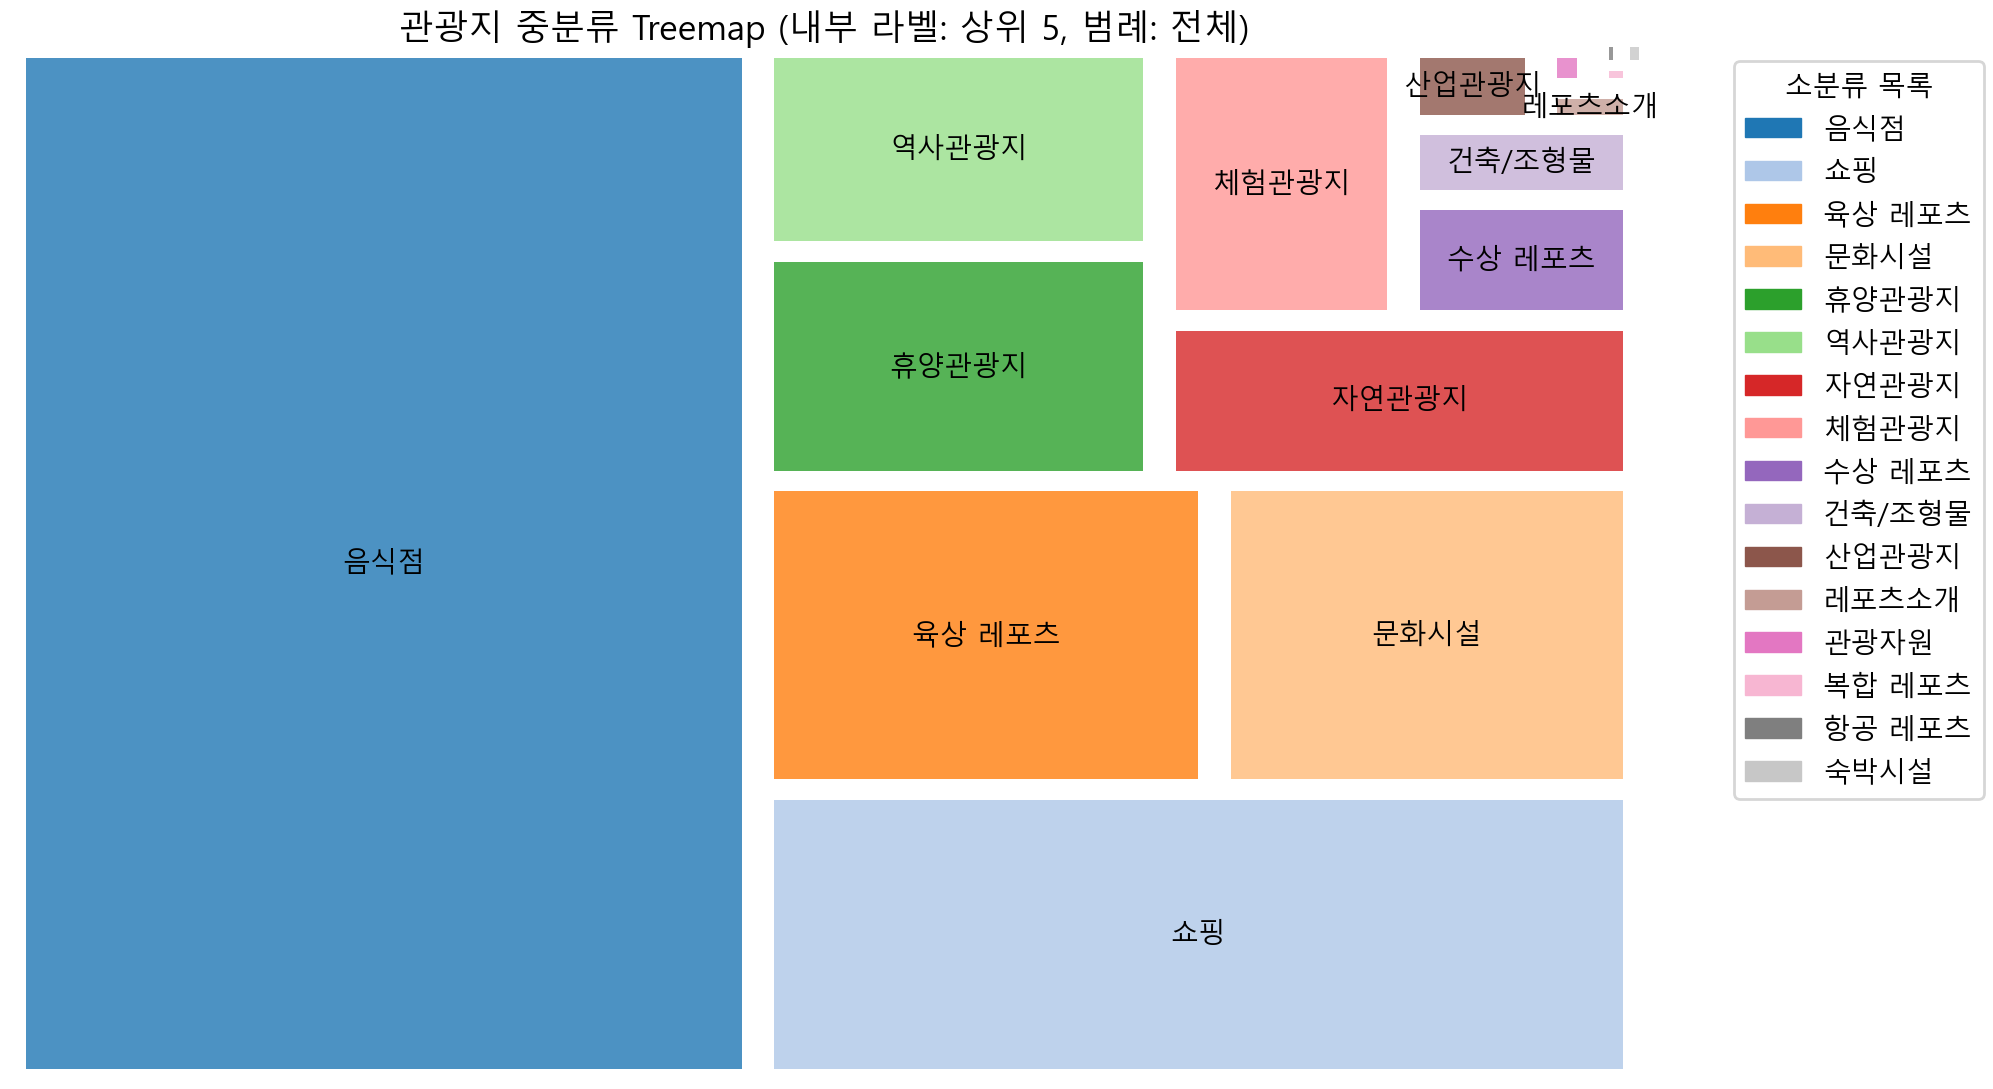

In [4]:
# 항목의 개수
n = len(df_top2)

# 색상 팔레트 지정
if n <= 20:
    cmap = plt.cm.tab20
    colors = [cmap(i) for i in range(n)]
else:
    cmap = plt.cm.get_cmap('viridis', n)
    colors = [cmap(i) for i in range(n)]

# 내부 Treemap에 표시할 라벨: 상위 5개 항목에 대해서만 라벨을 사용하고, 나머지는 빈 문자열("")로 처리
labels_top5 = [df_top2['중분류'].iloc[i] if i < 12 else "" for i in range(n)]

plt.figure(figsize=(20, 11))
squarify.plot(
    sizes=df_top2['건수'],
    label=labels_top5,         # 상위 5개만 내부 텍스트 라벨로 표시
    color=colors,              # 색상 적용
    alpha=0.8,
    pad=10,
    text_kwargs={'fontsize': 20}
)
plt.title('관광지 중분류 Treemap (내부 라벨: 상위 5, 범례: 전체)', fontsize=25)
plt.axis('off')

# 전체 항목에 대한 범례 생성 (모든 라벨 표시)
patches = [
    mpatches.Patch(color=colors[i], label=df_top2['중분류'].iloc[i])
    for i in range(n)
]

# 4) 범례 표시 (우상단에 배치 예시)
legend = plt.legend(
    handles=patches,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=20,           # 텍스트 크기를 키움
    title='소분류 목록',    # 범례 제목 (선택 사항)
    title_fontsize=20      # 범례 제목 텍스트 크기
)

legend.get_frame().set_linewidth(2)

plt.tight_layout()
plt.show()

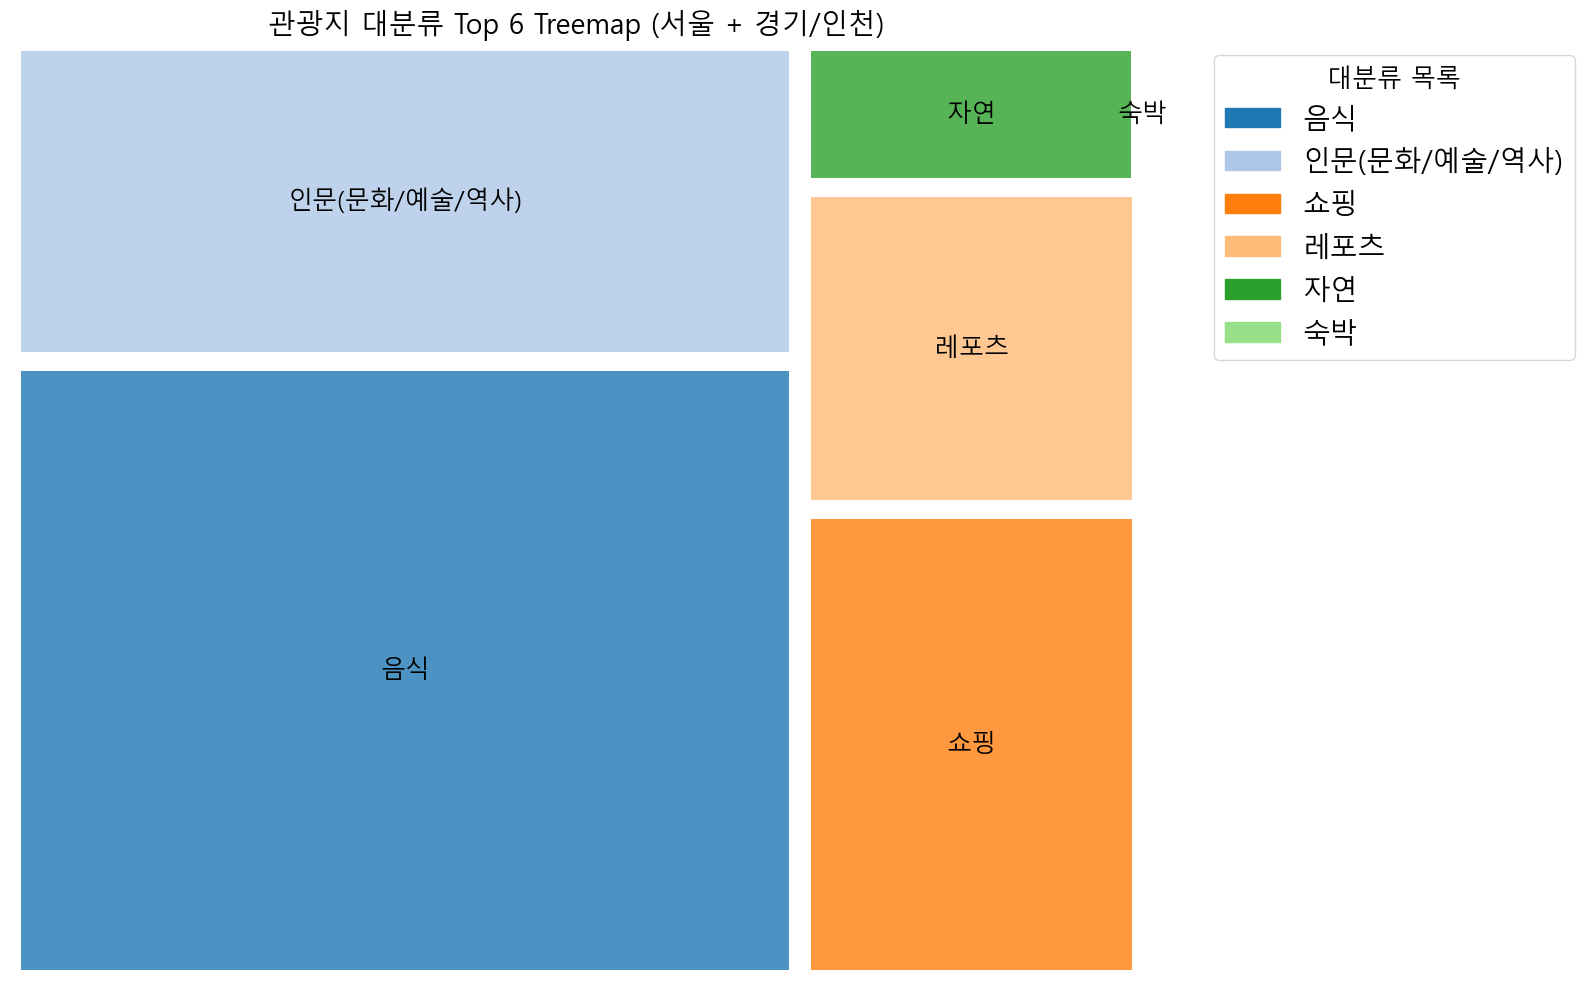

In [5]:
# Treemap 시각화 (대분류)
plt.figure(figsize=(16, 10))

# 1) 색상 팔레트 지정
#   - 예: plt.cm.tab20, plt.cm.Set3, plt.cm.Paired 등 다양한 팔레트 사용 가능
colors = plt.cm.tab20(range(len(df_top3))) 

# 2) Treemap 생성
squarify.plot(
    sizes=df_top3['건수'],
    label=df_top3['대분류'],
    color=colors,            # 색상 적용
    alpha=0.8,
    pad=True,
    text_kwargs={'fontsize': 18}
)

plt.title(f'관광지 대분류 Top {len(df_top3)} Treemap (서울 + 경기/인천)', fontsize=20)
plt.axis('off')

# 3) 범례(legend) 만들기
#   - 각 구역별 색상과 라벨을 1:1로 매핑하여 Patch 생성
patches = [
    mpatches.Patch(color=colors[i], label=df_top3['대분류'].iloc[i])
    for i in range(len(df_top3))
]

# 4) 범례 표시 (우상단에 배치 예시)
legend = plt.legend(
    handles=patches,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=20,           # 텍스트 크기를 키움
    title='대분류 목록',    # 범례 제목 (선택 사항)
    title_fontsize=18      # 범례 제목 텍스트 크기
)


plt.tight_layout()
plt.show()